In [8]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

In [9]:
PATH = './wav_data/'

In [13]:
angry = read(PATH + 'angry1.wav')
angry = np.array(angry[1], dtype=float)

happy = read(PATH + 'happy1.wav')
happy = np.array(happy[1], dtype=float)

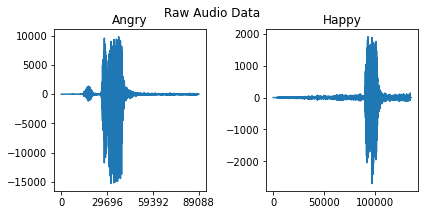

In [14]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(angry)
plt.title('Angry')
plt.xticks(np.linspace(0, len(angry), 4))

plt.subplot(1, 2, 2)
plt.plot(happy)
plt.title('Happy')
plt.tight_layout()
plt.suptitle('Raw Audio Data')

plt.savefig('./figure/raw_data.pdf', dpi=300)
plt.show()

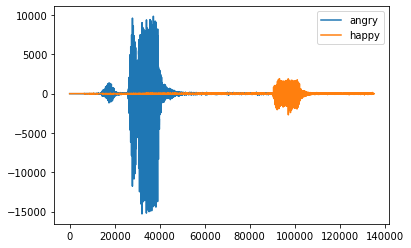

In [15]:
plt.plot(angry, label='angry')
plt.plot(happy, label='happy')
plt.legend()
plt.show()

In [104]:
path = './wav_data/'
dir_list = os.listdir(path)
for i in range(len(dir_list)):
    if dir_list[i] != '.ipynb_checkpoints':
        data = read(path + dir_list[i])[1]
        data = np.array(data)
        num_slience = np.count_nonzero(abs(data) < 20)
        ratio = 100 * num_slience / len(data)
        print(f'{i} -- {ratio:.2f}% of data will be removed')


0 -- 30.97% of data will be removed
1 -- 47.89% of data will be removed
3 -- 54.98% of data will be removed
4 -- 43.52% of data will be removed


In [113]:
def remove_silence(alpha=20):
    
    ## retreive all data under wav_data
    ## extract where the absolute intensity is greater than alpha = 20
    path = './wav_data/'
    dir_list = os.listdir(path)
    
    trimmed_data = []
    
    for i in range(len(dir_list)):
        if dir_list[i] != '.ipynb_checkpoints':
            data = read(path + dir_list[i])[1]
            data = np.array(data)
            num_slience = np.count_nonzero(abs(data) < 20)
            ratio = 100 * num_slience / len(data)
            print(f'{i} -- {ratio:.2f}% of data will be removed')
            
            data = data[abs(data) > alpha]
            filename = './trimmed_data/' + dir_list[i].split('.')[0] + '.npy'
            np.save(file=filename, arr=data)

In [114]:
remove_silence()

0 -- 30.97% of data will be removed
1 -- 47.89% of data will be removed
3 -- 54.98% of data will be removed
4 -- 43.52% of data will be removed


In [131]:
def normalize_data():
    
    ## min/max normalization
    path = './trimmed_data/'
    dir_list = os.listdir(path)
    
    
    for i in range(len(dir_list)):
        if dir_list[i] != '.ipynb_checkpoints':
            data = np.load(path + dir_list[i])
            
            diff = abs(max(data) - min(data))
            min_data = min(data)
            
            normalized_data = []
            for d in data:
                _d = float((d - min_data) / diff)
                normalized_data.append(_d)

            normalized_data = np.array(normalized_data)
            filename = './trimmed_data/' + dir_list[i].split('.')[0] + '.npy'
            np.save(file=filename, arr=normalized_data)

In [132]:
normalize_data()

In [87]:
np.count_nonzero(angry != 0), np.count_nonzero(angry == 0), np.count_nonzero(abs(angry) < 20)/89088

(85492, 3596, 0.3097162356321839)

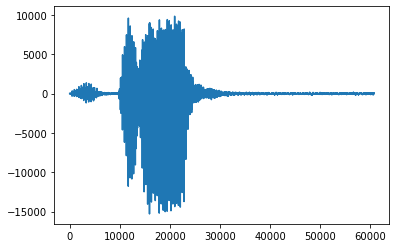

In [89]:
plt.plot(angry[abs(angry) > 20])

In [90]:
angry[-1]

0.0

In [76]:
def normalize_data(data):
    normalized_data = []
    diff = abs(max(data) - min(data))
    min_data = min(data)
    for d in data:
        _d = (d - min_data) / diff
        
        normalized_data.append(_d)
    normalized_data = np.array(normalized_data)
    print(np.count_nonzero(abs(normalized_data) == 0))
    return np.trim_zeros(normalized_data)

In [86]:
1/44.1*10**3, len(angry)

(22.675736961451246, 89088)

In [78]:
44.1*10**3

44100.0

2
4


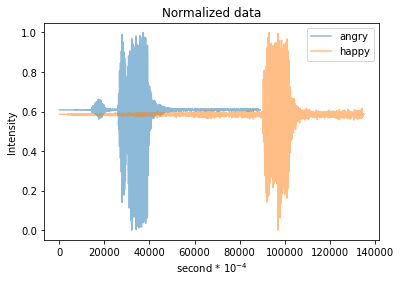

In [79]:
iphone_sample_rate = 44.1 * 10**3

plt.plot(normalize_data(angry), label='angry', alpha=0.5)
plt.plot(normalize_data(happy), label='happy', alpha=0.5)
plt.legend()
plt.title('Normalized data')
# plt.xticks(np.linspace(0, len(angry) / iphone_sample_rate, 10))
# plt.xticks([0, len(angry) / iphone_sample_rate])
plt.ylabel('Intensity')
plt.xlabel('second * $10^{-4}$')
plt.show()

In [61]:
def convert_db(data):
    converted_data = []
    for d in data:
        if d != 0:
            converted_data.append(20 * np.log10(abs(d)))
        else:
            converted_data.append(0)
    converted_data = np.array(converted_data)
    return np.trim_zeros(converted_data)

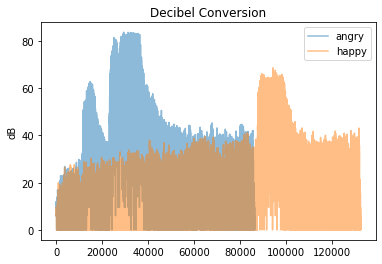

In [63]:
plt.plot(convert_db(angry), label='angry', alpha=0.5)
plt.plot(convert_db(happy), label='happy', alpha=0.5)
plt.legend()
plt.title('Decibel Conversion')
plt.ylabel('dB')
plt.show()

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
def trim_audio(data, threshold=20):
    trimmed = []
    for d in data:
        condition = abs(data) > threshold
        _trimmed = np.extract(condition, data)
        trimmed.append(_trimmed)
    trimmed = np.array(trimmed)
    
    PATH = './audio_array/'
    np.save(PATH, trimmed)
    return np.array(trimmed)

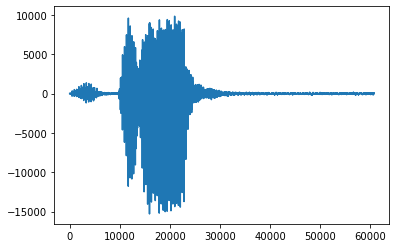

In [114]:
condition = abs(angry) > 20
trimmed = np.extract(condition, angry)
plt.plot(trimmed)

In [109]:
trimmed.shape

(85492,)

## What to do tomorrow (4/17)
1. import bunch of audio files
2. add a label (angry = 0, happy = 1)
3. save them as numpy in a folder
4. construct a CNN model

In [2]:
from preprocessing import *

In [3]:
df = make_dataframe()
df

,filename,class,classID
0,angry1.wav,angry,0
1,angry2.wav,angry,0
2,happy1.wav,happy,1
3,happy2.wav,happy,1


In [6]:
audio_array = []
path = './wav_data/'
for data in df['filename']:
    d = read(path + data)
    print(d)
    d = np.array(d, dtype=float)
    print(d)
    audio_array.append(trim_audio(d))

FileNotFoundError: [Errno 2] No such file or directory: './wav_data/angry1.wav'